# Abalone Case Study

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt

In [4]:
#read csv file using pandas library
df = pd .read_csv("Abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
df.shape

(4177, 9)

In [7]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

we don't have any missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
numerical_features = ["Length", 'Diameter', 'Height','Whole weight',
                      'Shucked weight', 'Viscera weight', 'Shell weight']

categorical_feature = "Sex"

features = numerical_features + [categorical_feature]

target = 'Rings'

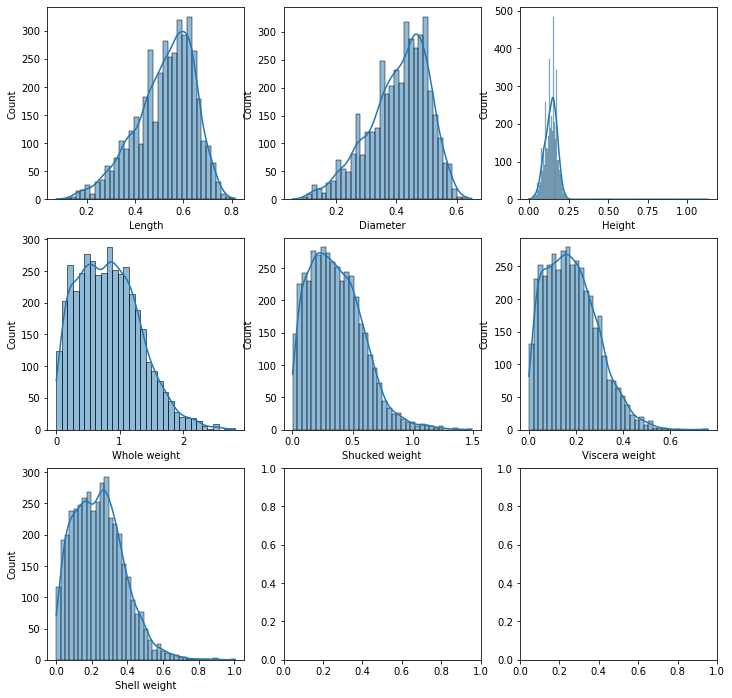

In [12]:
fig,ax = plt.subplots(3,3,figsize=(12,12))
row = col = 0
for n,i in enumerate(numerical_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.histplot(df[i],kde=True,ax=ax[row,col])
    col += 1

there is skewness in the data

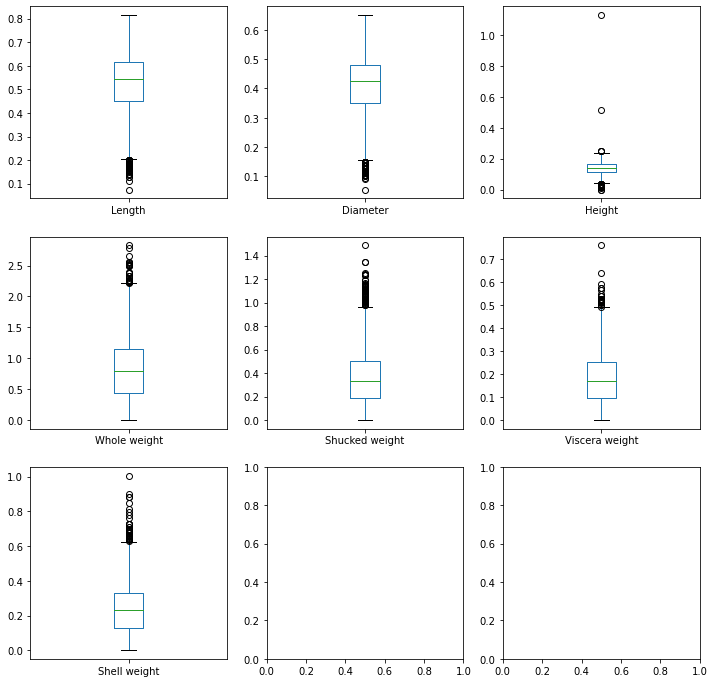

In [13]:
fig,ax = plt.subplots(3,3,figsize=(12,12))
row = col = 0
for n,i in enumerate(numerical_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    df[i].plot(kind="box",ax=ax[row,col])
    col += 1

there are outliers present

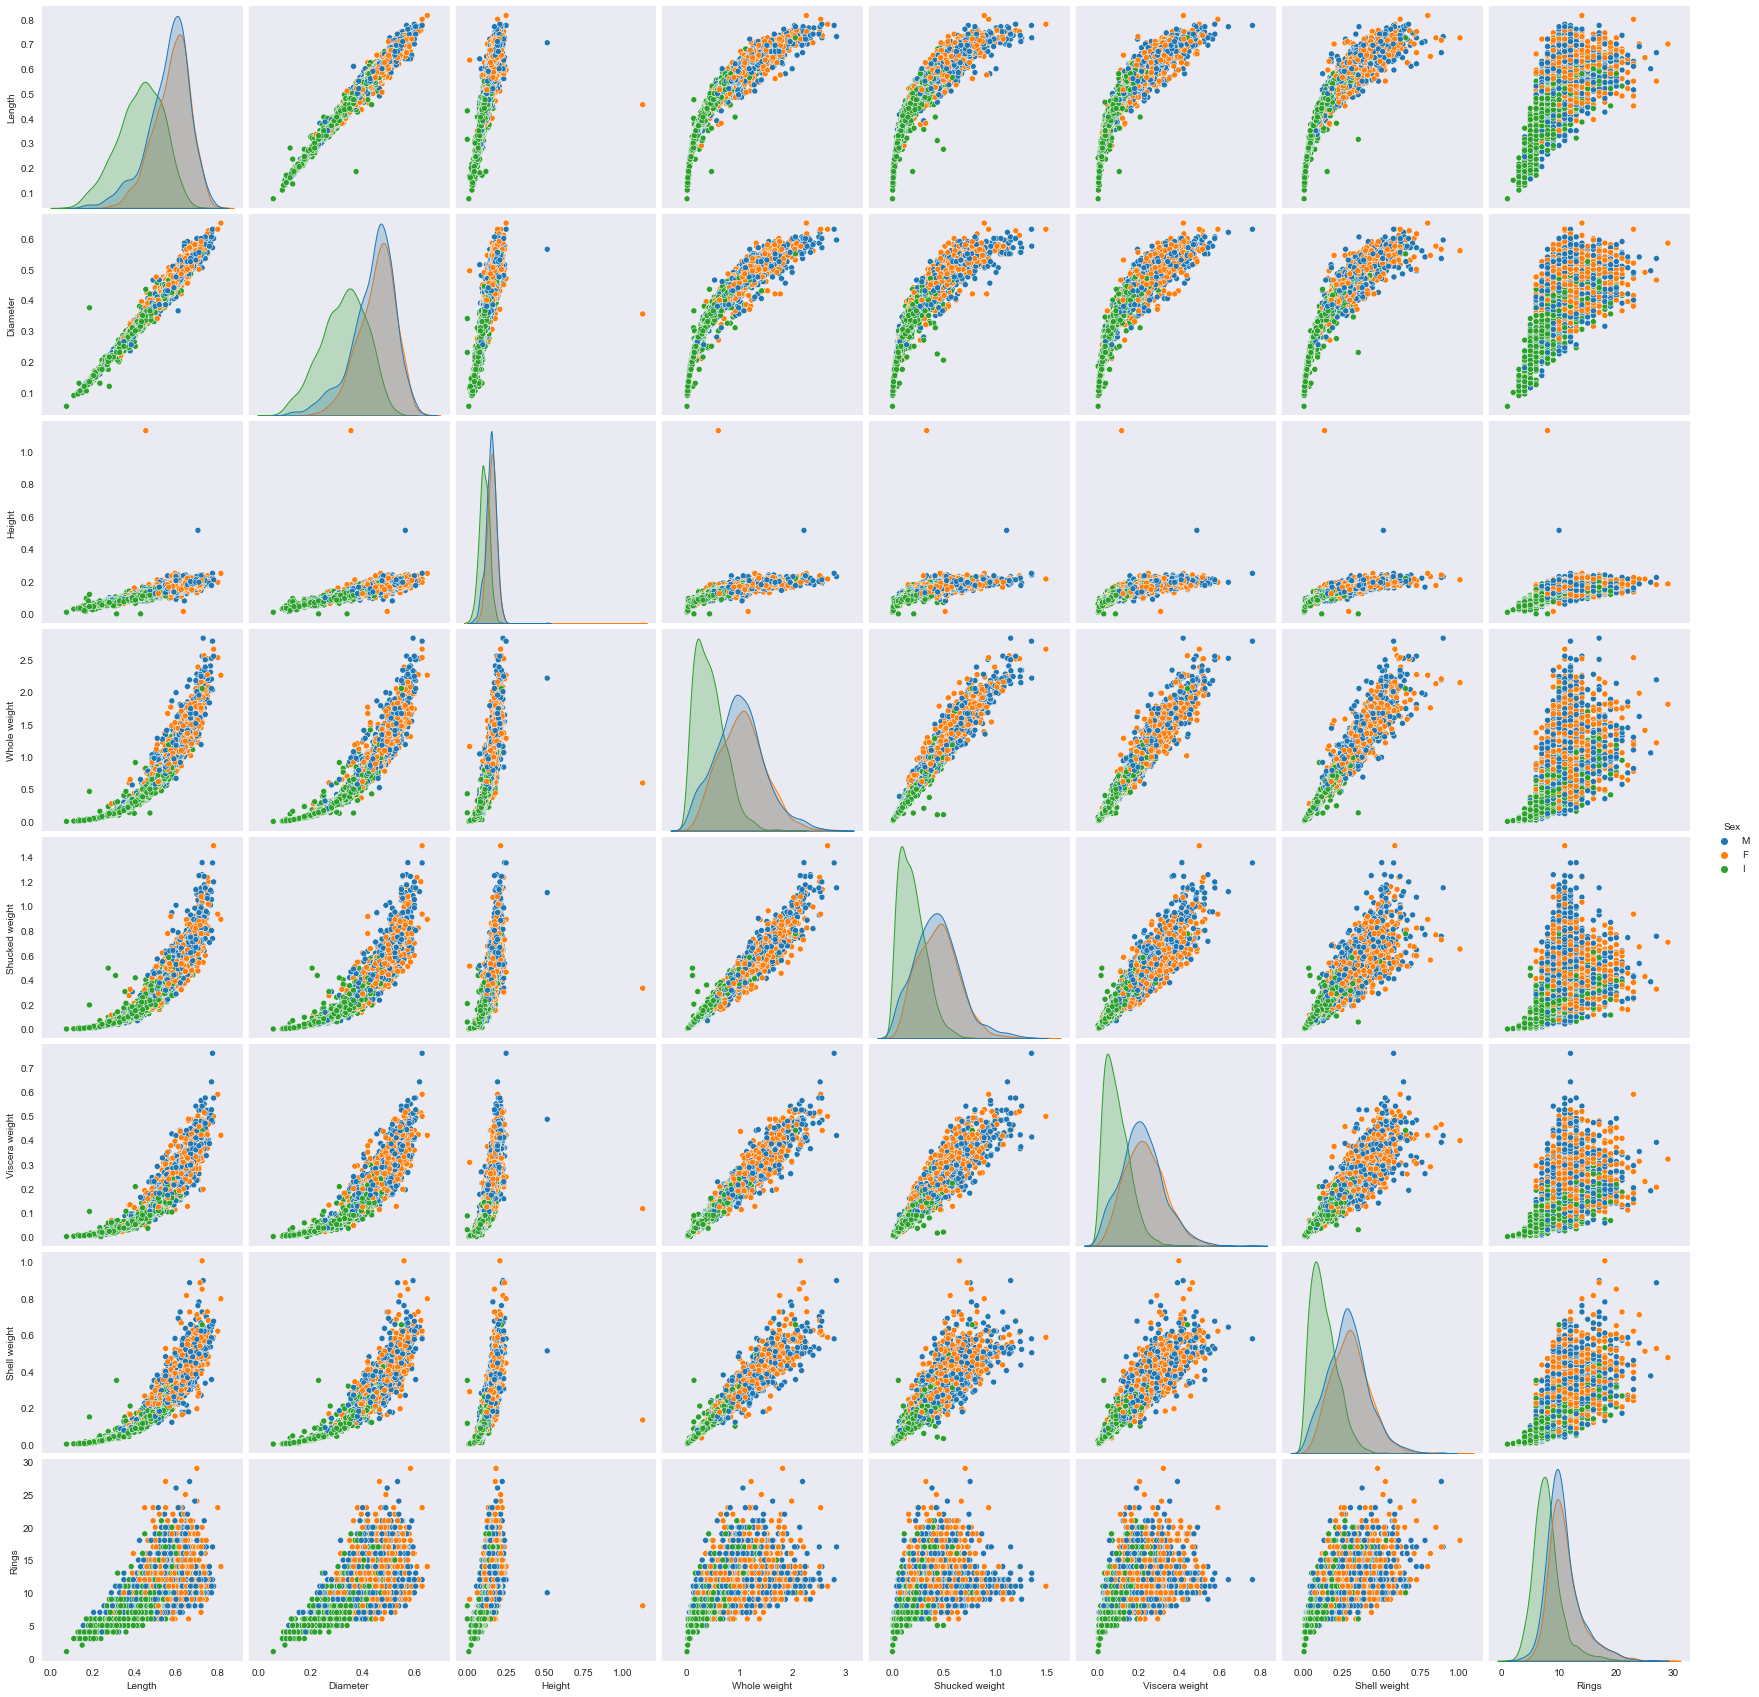

In [15]:
sns.set_style('dark')
sns.pairplot(df,hue='Sex',size=3)
plt.show()

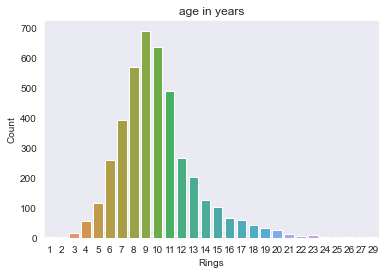

In [16]:
count = df["Rings"].value_counts()
plt.figsize = (5,4)
plt.ylabel("Count")
plt.xlabel("Rings")
plt.title("age in years")
sns.barplot(count.index, count.values)
plt.show()

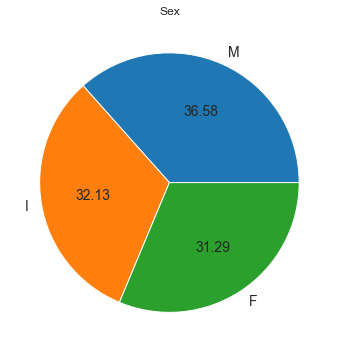

In [17]:
t = df[categorical_feature].value_counts(normalize=True)
t.plot(kind='pie',
       figsize=(5,5),
       title=categorical_feature,
       ylabel="",
       autopct="%.2f",
       fontsize=14)
plt.tight_layout()
plt.show()

In [18]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

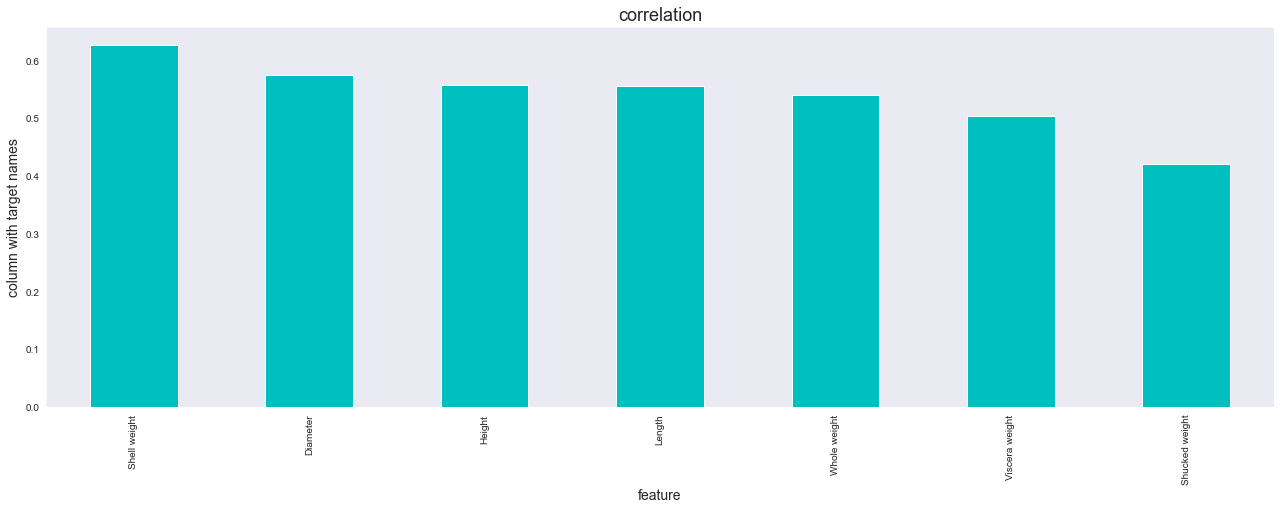

In [19]:
plt.figure(figsize=(22,7))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show

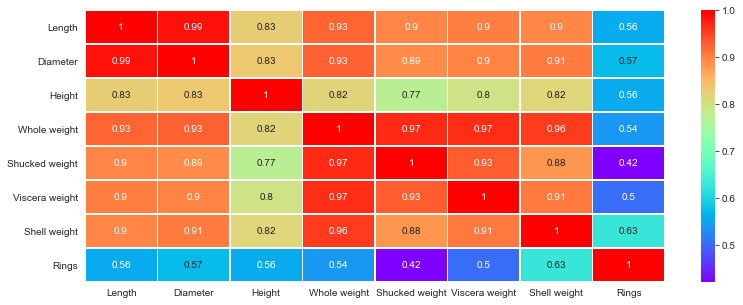

In [20]:
fig, ax = plt.subplots(figsize=(13,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax, cmap='rainbow')
plt.show()


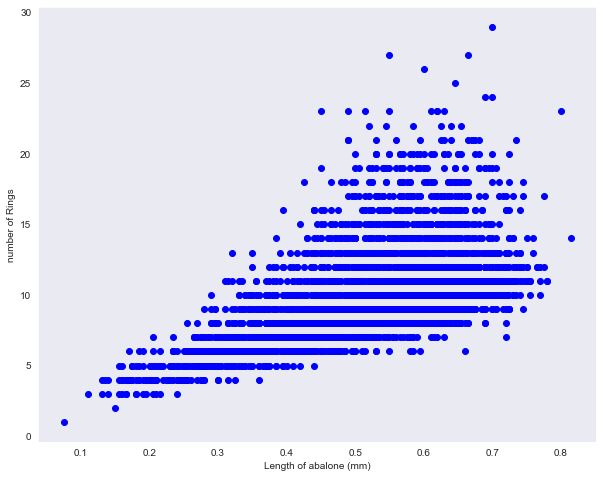

In [21]:
plt.figure(figsize=(10,8))
plt.scatter (df['Length'],df['Rings'], c = 'blue')
plt.xlabel('Length of abalone (mm)')
plt.ylabel('number of Rings')
plt.show()


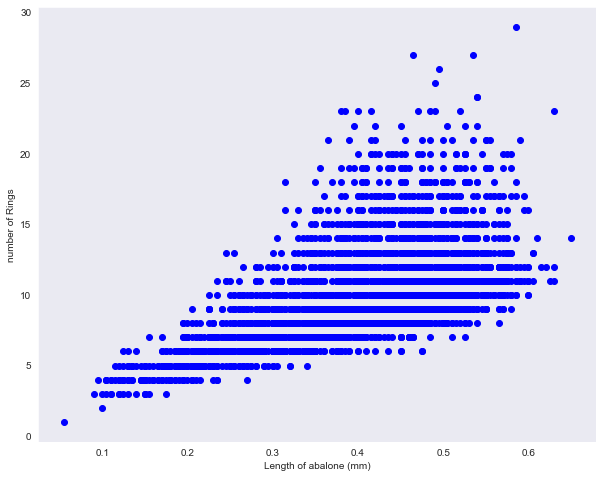

In [22]:
plt.figure(figsize=(10,8))
plt.scatter (df['Diameter'],df['Rings'], c = 'blue')
plt.xlabel('Length of abalone (mm)')
plt.ylabel('number of Rings')
plt.show()

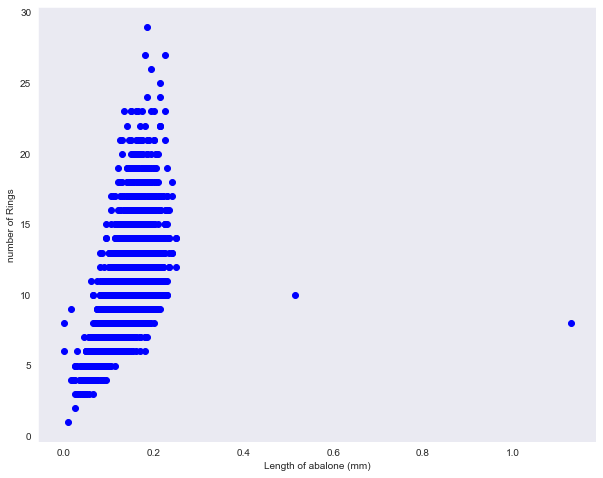

In [23]:
plt.figure(figsize=(10,8))
plt.scatter (df['Height'],df['Rings'], c = 'blue')
plt.xlabel('Length of abalone (mm)')
plt.ylabel('number of Rings')
plt.show()

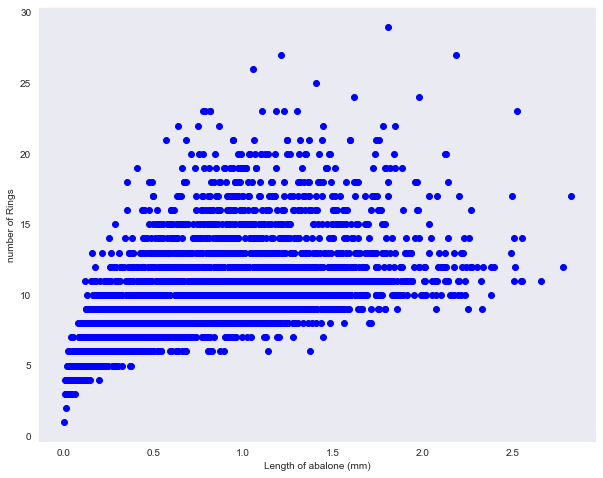

In [24]:
plt.figure(figsize=(10,8))
plt.scatter (df['Whole weight'],df['Rings'], c = 'blue')
plt.xlabel('Length of abalone (mm)')
plt.ylabel('number of Rings')
plt.show()

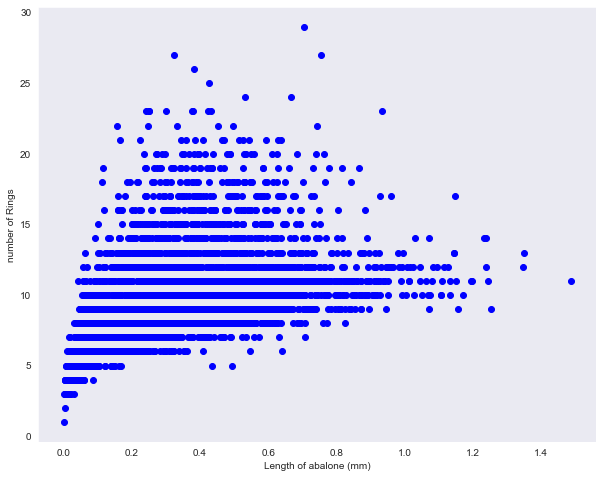

In [25]:
plt.figure(figsize=(10,8))
plt.scatter (df['Shucked weight'],df['Rings'], c = 'blue')
plt.xlabel('Length of abalone (mm)')
plt.ylabel('number of Rings')
plt.show()

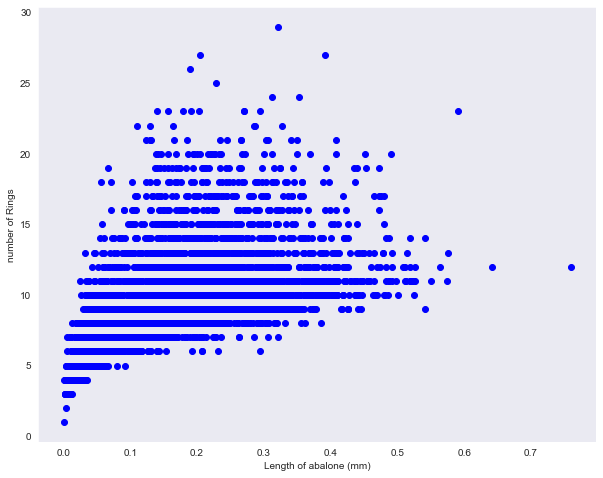

In [26]:
plt.figure(figsize=(10,8))
plt.scatter (df['Viscera weight'],df['Rings'], c = 'blue')
plt.xlabel('Length of abalone (mm)')
plt.ylabel('number of Rings')
plt.show()

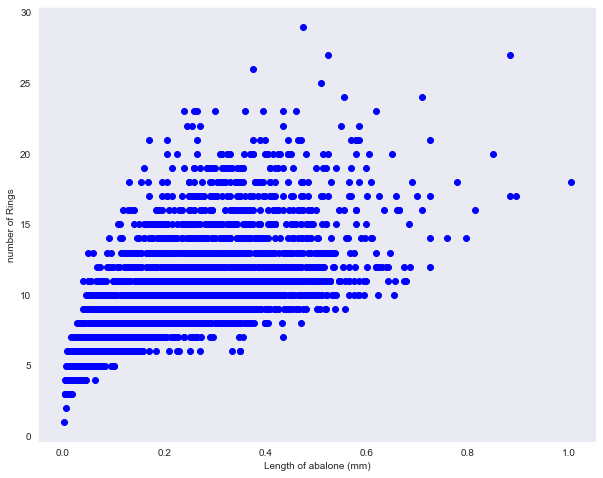

In [27]:
plt.figure(figsize=(10,8))
plt.scatter (df['Shell weight'],df['Rings'], c = 'blue')
plt.xlabel('Length of abalone (mm)')
plt.ylabel('number of Rings')
plt.show()

Above all the scatter plot graphs shows Some features has a linear relationship with target.

In [28]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [29]:
df['Sex']=e.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [30]:
y = df["Rings"].values
x = df.drop(["Rings"],axis=1)

In [31]:
x.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

In [32]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [33]:
df_new.skew()

Sex              -0.176442
Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
dtype: float64

In [34]:
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.127072,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809
1,1.127072,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420
2,-1.307935,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262
3,1.127072,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931
4,-0.009459,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528
...,...,...,...,...,...,...,...,...
4172,-1.307935,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008
4173,1.127072,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215
4174,1.127072,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398
4175,-1.307935,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145


In [35]:
df.shape

(4177, 9)

In [36]:
df_new.shape

(4177, 8)

In [37]:
df_new.skew()

Sex              -0.176442
Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
dtype: float64

# Data preprocessing

In [38]:
y = df["Rings"].apply(lambda y_value: 1 if y_value>=7 else 0)
y

0       1
1       1
2       1
3       1
4       1
       ..
4172    1
4173    1
4174    1
4175    1
4176    1
Name: Rings, Length: 4177, dtype: int64

In [39]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x , y = SM.fit_resample(x,y)

In [40]:
y.value_counts()

1    3729
0    3729
Name: Rings, dtype: int64

# Model Building

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=12)

In [43]:
logistic_reg = LogisticRegression()
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()
svm = SVC()

In [44]:
def classify(model,x,y):
#train the model
    model.fit(xtrain,ytrain)
    print('Accuracy:',model.score(xtest,ytest)*100)
#cross validation    
    score = cross_val_score(model,x,y,cv=5)
    print('CV Score:',np.mean(score)*100)

In [45]:
model = LogisticRegression()
classify(model,x,y)

Accuracy: 90.0804289544236
CV Score: 88.85804550268546


In [46]:
model = RandomForestClassifier()
classify(model,x,y)

Accuracy: 95.8176943699732
CV Score: 95.0659182979917


In [47]:
model = DecisionTreeClassifier ()
classify(model,x,y)

Accuracy: 93.24396782841823
CV Score: 92.50520999095556


In [48]:
model = SVC ()
classify(model,x,y)

Accuracy: 90.56300268096514
CV Score: 89.3942744941499


# Hyperparameter Tuning

In [49]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score

In [50]:
model=RandomForestClassifier()

In [51]:
params = {'n_estimators':[20,70,100],
                            'criterion':['gini','entropy'],
                             'max_depth':[None,5,10],
                             'min_samples_split':[2,7],
                             'min_samples_leaf':[1,2,4]}

In [52]:
grid_search = GridSearchCV(estimator=model,param_grid = params,cv = 3,verbose = 2,n_jobs = 4)

In [53]:
grid_search.fit(xtrain,ytrain)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 7],
                         'n_estimators': [20, 70, 100]},
             verbose=2)

In [54]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [55]:
model = RandomForestClassifier(criterion = 'gini', max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 70)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9613941018766756

In [56]:
ypred = model.predict(xtest)

In [57]:
accuracy_score(ytest,ypred)

0.9613941018766756

In [58]:
from sklearn.metrics import roc_auc_score,roc_curve

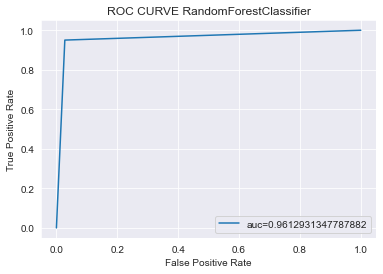

The Score for the ROC Curve is : 96.13000000000001%


In [59]:
fpr, tpr, _= roc_curve(ytest, ypred)
auc_score = roc_auc_score(ytest, ypred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

# Saving the model

In [60]:
import joblib
joblib.dump(model,'abalone.pkl')

['abalone.pkl']